<a href="https://colab.research.google.com/github/aswinsuresh-04/Regression_Analysis/blob/main/Principal_Component_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#synthetic regression dataset

# Import necessary libraries
import numpy as np
import pandas as pd

# Set a random seed for reproducibility
np.random.seed(42)

# Generate random data
n_rows = 100
X1 = np.random.normal(0, 1, n_rows)  # Feature 1
X2 = np.random.normal(5, 2, n_rows)  # Feature 2
X3 = np.random.normal(10, 1, n_rows)  # Feature 3
X4 = np.random.normal(15, 3, n_rows)  # Feature 4
X5 = np.random.normal(20, 2, n_rows)  # Feature 5

# Create some correlation between the features and the target variable
y = 3 * X1 + 2 * X2 + 5 * X3 + np.random.normal(0, 2, n_rows)  # Target variable

# Create a DataFrame
data = pd.DataFrame({
    'Feature_1': X1,
    'Feature_2': X2,
    'Feature_3': X3,
    'Feature_4': X4,
    'Feature_5': X5,
    'Target': y
})

# Save the data to a CSV file
data.to_csv('generated_dataset.csv', index=False)

# Display the first few rows
print(data.head())


   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5     Target
0   0.496714   2.169259  10.357787  12.513015  16.811145  59.469951
1  -0.138264   4.158709  10.560785  13.319457  18.801250  64.525382
2   0.647689   4.314571  11.083051  17.241881  20.010487  63.190329
3   1.523030   3.395445  11.053802  16.831111  20.093961  67.754929
4  -0.234153   4.677429   8.622331  14.937295  19.099869  50.462765


First few rows of the dataset:
   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5     Target
0   0.496714   2.169259  10.357787  12.513015  16.811145  59.469951
1  -0.138264   4.158709  10.560785  13.319457  18.801250  64.525382
2   0.647689   4.314571  11.083051  17.241881  20.010487  63.190329
3   1.523030   3.395445  11.053802  16.831111  20.093961  67.754929
4  -0.234153   4.677429   8.622331  14.937295  19.099869  50.462765

Missing values in each column:
Feature_1    0
Feature_2    0
Feature_3    0
Feature_4    0
Feature_5    0
Target       0
dtype: int64

Explained variance by each principal component:
Principal Component 1: 0.2983
Principal Component 2: 0.2070
Principal Component 3: 0.1996
Principal Component 4: 0.1648
Principal Component 5: 0.1303

Mean Squared Error: 4.3801
R^2 Score: 0.8828


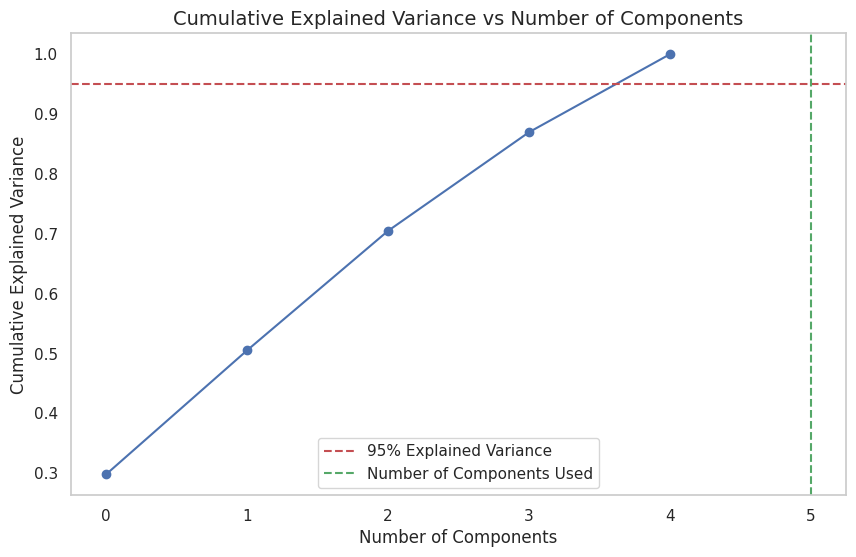

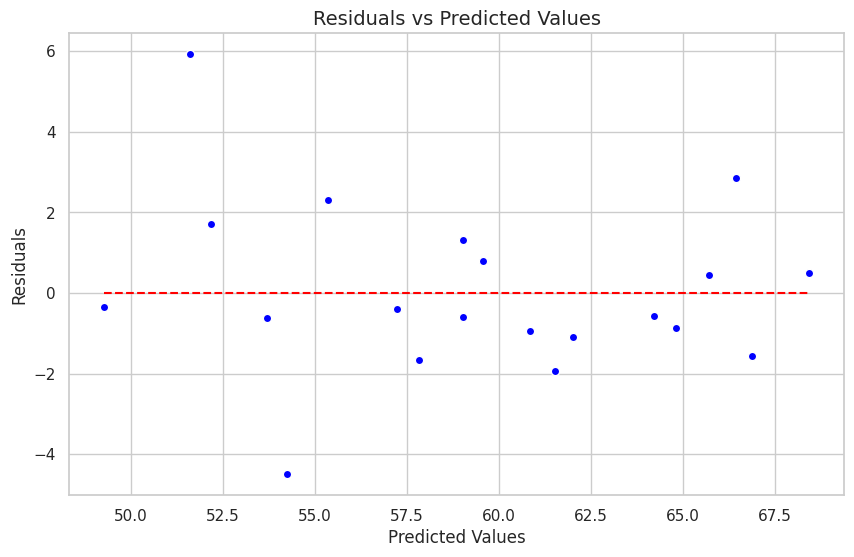

In [ ]:
# Step 1: Import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for the plots
sns.set(style='whitegrid')

# Step 2: Load your dataset
data = pd.read_csv('generated_dataset.csv')  # Load your data

# Check the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())

# Correct column names
X = data.drop('Target', axis=1)  # Features (all columns except 'Target')
y = data['Target']  # Target variable

# Step 3: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Apply PCA
n_components = min(X.shape[1], 5)  # Ensure we don't exceed the number of features
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# Explained variance
print("\nExplained variance by each principal component:")
for i, variance in enumerate(pca.explained_variance_ratio_, start=1):
    print(f"Principal Component {i}: {variance:.4f}")

# Step 5: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Step 6: Fit Linear Regression to principal components
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Step 7: Make predictions
y_pred = regressor.predict(X_test)

# Step 8: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'\nMean Squared Error: {mse:.4f}')
print(f'R^2 Score: {r2:.4f}')  # Additional metric to evaluate the model

# Optional: Plot the explained variance of the principal components
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components', fontsize=12)
plt.ylabel('Cumulative Explained Variance', fontsize=12)
plt.title('Cumulative Explained Variance vs Number of Components', fontsize=14)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Explained Variance')
plt.axvline(x=n_components, color='g', linestyle='--', label='Number of Components Used')
plt.legend()
plt.grid()
plt.show()

# Optional: Residual plot for model evaluation
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, y_pred - y_test, c='blue', marker='o', edgecolor='white', label='Residuals')
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), color='red', linestyle='--')
plt.xlabel('Predicted Values', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.title('Residuals vs Predicted Values', fontsize=14)
plt.show()


In [ ]:
# prompt: use the same principal component regression code on titanic dataset by importing it and also show prediction

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the Titanic dataset (assuming it's in a CSV file named 'titanic.csv')
# You can download it from Kaggle or other sources
data = pd.read_csv('titanic.csv')  # Replace 'titanic.csv' with your file name

# Data preprocessing (handle missing values, convert categorical features, etc.)
# For example, let's drop some irrelevant columns and fill missing 'Age' with the median
data = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})  # Convert 'Sex' to numerical

# Separate features (X) and target (y)
X = data.drop('Survived', axis=1)
y = data['Survived']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=0.95)  # Keep enough components to explain 95% of the variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Fit a linear regression model to the principal components
regressor = LinearRegression()
regressor.fit(X_train_pca, y_train)

# Make predictions on the test set
y_pred = regressor.predict(X_test_pca)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.4f}')
print(f'R^2 Score: {r2:.4f}')

# You can also print the predictions themselves
print("\nPredictions:")
print(y_pred)